### Creating a linear dataset
**function used to generate the data is y = 4 + 3x1 + Gaussian noise**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

### Normal Equation
**θ = (X^⊺ * X)^−1 * X^⊺ * y**

* **a*b** = dot product
* **X^T** = Transpose of X
* **(X^⊺ * X)^−1** = inverse of the dot product of the transpose of X and X

In [2]:
z = [5, 4, 7]
a = [9, 2, 3]
a = np.array(a)
z = np.array(z)

# Find dot pdct
b = np.dot(a,z)

# Cross product
c = np.cross(a,z)

d = np.c_[np.array(z), np.array(a)]

b, c, d

(74,
 array([  2, -48,  26]),
 array([[5, 9],
        [4, 2],
        [7, 3]]))

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance

# Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.41490348],
       [2.80520505]])

* **.linalg** = linear algebra
* **.inv** = Compute the (multiplicative) inverse of a matrix
* **np.ones((row, column))** = output 1 for specified rows and columns
* **.T** = transpose
* **.dot()** = dot product
* **np.c_[]** = arranges arrays in proper axis from [x1, y1], [x2, y2] to [x1, x2], [y1, y2]

**predictions using θ:**

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.41490348],
       [10.02531358]])

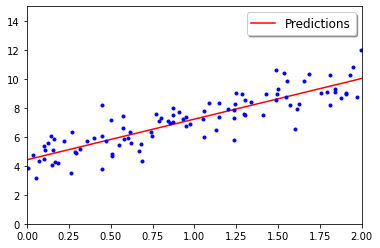

In [5]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend(loc="best", shadow=True, fontsize="large")
plt.show()

### Performing Linear Regression using Scikit-Learn

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.41490348]), array([[2.80520505]]))

In [7]:
lin_reg.predict(X_new)

array([[ 4.41490348],
       [10.02531358]])

#### LinearRegression class is based on the scipy.linalg.lstsq() function [least squares]

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.41490348],
       [2.80520505]])

In [9]:
residuals, rank, s

(array([84.80397768]), 2, array([14.45737436,  4.03680915]))

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[4.41490348],
       [2.80520505]])